In [2]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#reading the dataset
df=pd.read_csv("/content/50_Startups.csv", sep=',')
print(df.head())
df=df.drop('State', axis=1)

#let's understand data
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755 

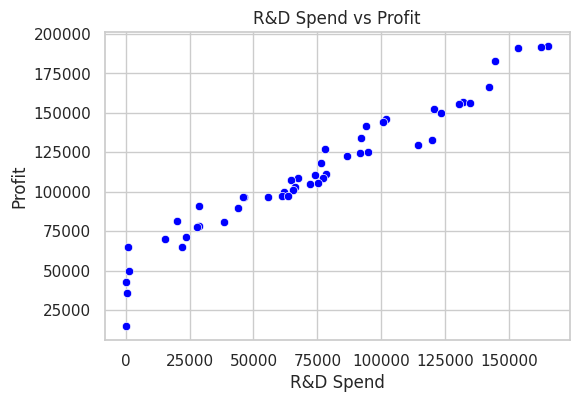

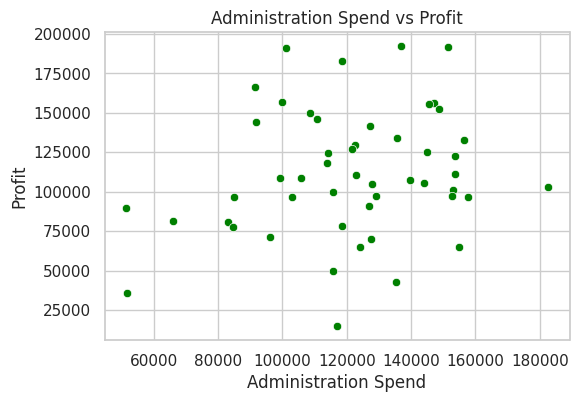

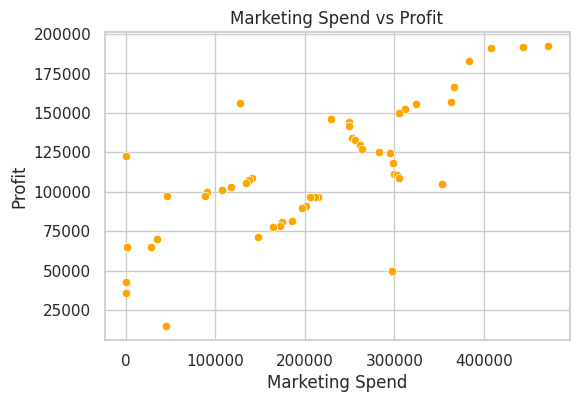

In [3]:
#Relationship of each spend to Profit

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(6,4))
sns.scatterplot(x='R&D Spend', y='Profit', data=df, color='blue')
plt.title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Administration', y='Profit', data=df, color='green')
plt.title("Administration Spend vs Profit")
plt.xlabel("Administration Spend")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Marketing Spend', y='Profit', data=df, color='orange')
plt.title("Marketing Spend vs Profit")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()


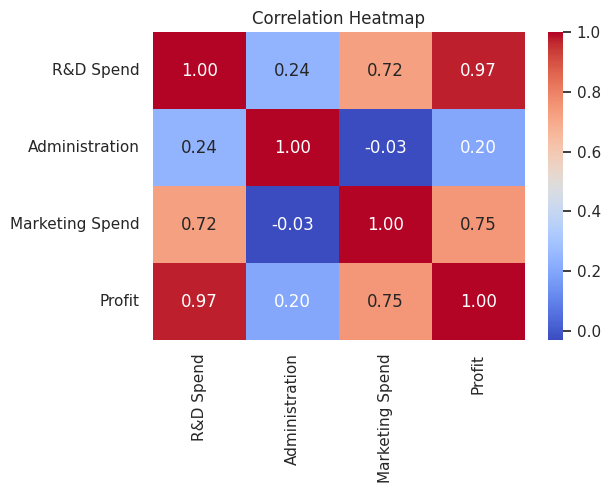

In [4]:
#correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


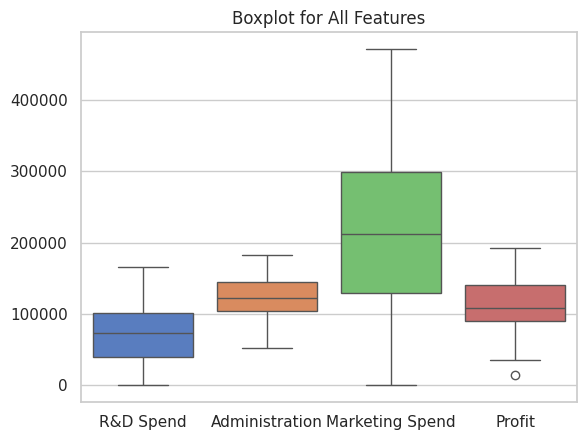

In [5]:
# Checking outliers
sns.boxplot(data=df)
plt.title("Boxplot for All Features")
plt.show()

In [6]:

# FEatures(x) and target(y)
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Actual vs Predicted Profit:
    Actual Profit  Predicted Profit
13      134307.35     126703.027165
39       81005.76      84894.750816
30       99937.59      98893.418160
45       64926.08      46501.708150
17      125370.37     129128.397344
48       35673.41      50992.694863
26      105733.54     109016.553658
25      107404.34     100878.464145
32       97427.84      97700.596386
19      122776.86     113106.152922


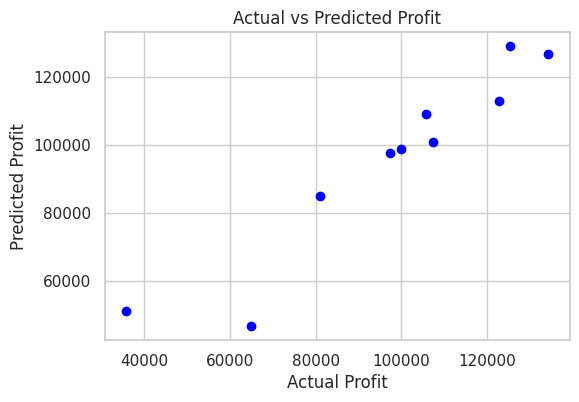

Accuracy percentage of the model:90.00653083037321%


In [7]:

#Checking accuracy of prediction
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred})
print("Actual vs Predicted Profit:")
print(results)

# Visualization - Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

#Accuracy score
r2 = metrics.r2_score(y_test, y_pred)
r2_percentage = r2 * 100
print(f"Accuracy percentage of the model:{r2_percentage}%")